# Исследование надежности заемщиков


## Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


**Описание данных**

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита


In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

In [1]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Вывод:**
* В двух столбцах есть пропущенные значения. 
    
    * Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. 
    
    * Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Столбец `days_employed`(количество дней трудового стажа) имеет отрицательное значение. Заменим все отрицательные значения положительными

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Вывод:** 

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

Выведем перечень уникальных значений столбца `children`.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Вывод:** В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены.

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [14]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, то удалим их

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

Создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`
- 30001–50000 — `'D'`
- 50001–200000 — `'C'`
- 200001–1000000 — `'B'`
- 1000001 и выше — `'A'`

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`
- `'операции с недвижимостью'`
- `'проведение свадьбы'`
- `'получение образования'`

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследование данных

#### Проверим есть ли зависимость между количеством детей и возвратом кредита в срок

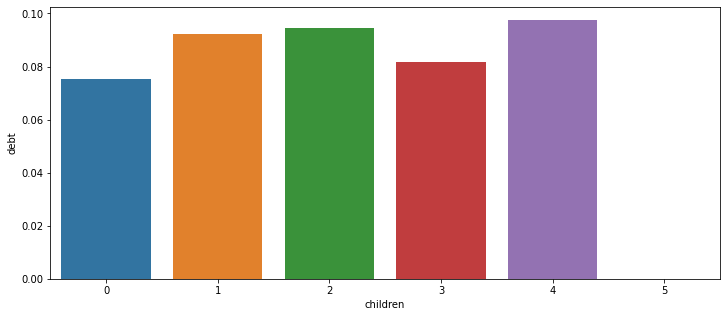

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64

In [22]:
df_plot = data.groupby('children')['debt'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot, x='children', y='debt')
plt.show()

display(data.groupby('children')['debt'].count())

In [23]:
data.loc[data['children'] == 0, 'GROUP'] = 'no_children'
data.loc[data['children'] != 0, 'GROUP'] = 'yes_children'

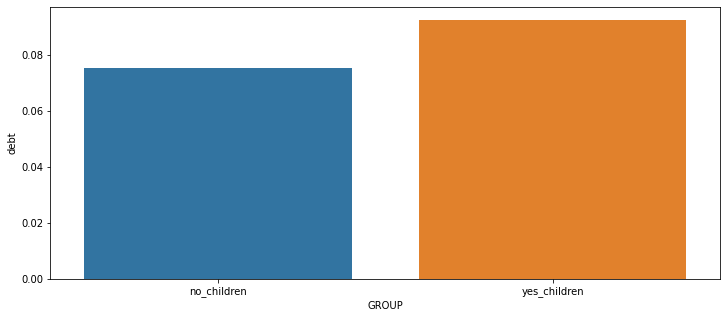

,GROUP,debt
0,no_children,0.075438
1,yes_children,0.092403


In [24]:
df_plot = data.groupby('GROUP')['debt'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot, x='GROUP', y='debt')
plt.show()

display(data.groupby('GROUP')['debt'].mean().reset_index())

In [25]:
data.loc[data['children'] == 0, 'GROUP'] = 'no_children'
data.loc[data['children'] == 1, 'GROUP'] = 'one_child'
data.loc[data['children'] > 1,  'GROUP'] = 'more_one_children'

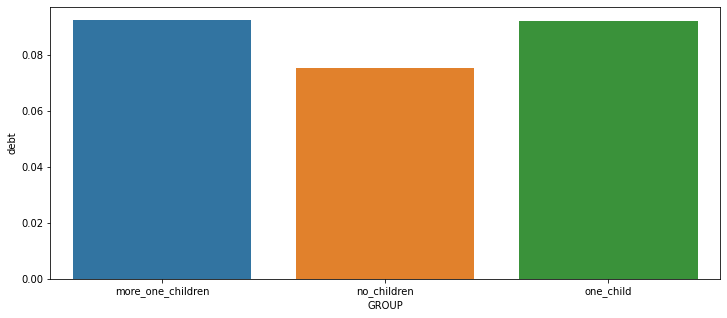

,GROUP,debt
0,more_one_children,0.092516
1,no_children,0.075438
2,one_child,0.092346


In [26]:
df_plot = data.groupby('GROUP')['debt'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot, x='GROUP', y='debt')
plt.show()

display(data.groupby('GROUP')['debt'].mean().reset_index())

**Вывод:** Из графиков и таблиц можно сделать следующие выводы:
1. Чем больше у человека детей тем выше веротность что у него была хотя бы раз задолжность по кредиту
2. Для более более детального анализа (зависимость между количеством детей и возвратом кредита в срок) нужно больше данных по людям с 3 - 5 детьми

#### Проверим есть ли зависимость между семейным положением и возвратом кредита в срок

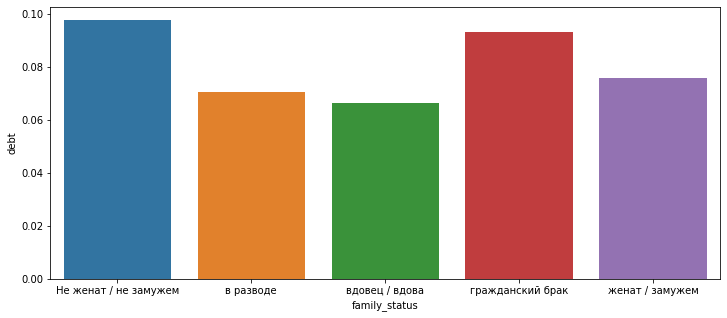

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64

In [27]:
df_plot = data.groupby('family_status')['debt'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot, x='family_status', y='debt')
plt.show()

display(data.groupby('family_status')['debt'].count())

In [28]:
data.loc[data['family_status'].isin(['Не женат / не замужем', 'гражданский брак']), 'GROUP'] = 'A'
data.loc[data['family_status'].isin(['в разводе', 'вдовец / вдова', 'женат / замужем']), 'GROUP'] = 'B'

In [30]:
data.groupby('GROUP')['debt'].mean() * 100

GROUP
A    9.494949
B    7.457815
Name: debt, dtype: float64

**Вывод:** <br> 
Люди с семейным положением "В разводе", "Вдова / вдовец", "Женат / замужем" имеют долю просрочки (7.45%) ниже чем люди с семейным положением "Не женат / не замужем" и "Гражданский брак" (9.5%)

#### Проверим есть ли зависимость между уровнем дохода и возвратом кредита в срок

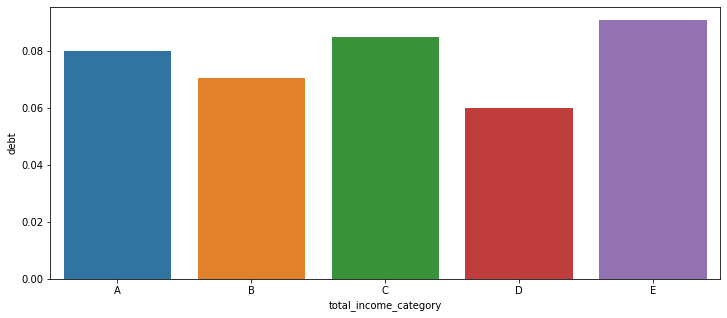

,count,mean
total_income_category,,
A,25,0.080000
B,5014,0.070602
C,15921,0.084982
D,349,0.060172
E,22,0.090909


In [32]:
df_plot = data.groupby('total_income_category')['debt'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot, x='total_income_category', y='debt')
plt.show()

display(data.groupby('total_income_category')['debt'].agg(['count', 'mean']))

Расшифровка категорий дохода:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Вывод:** <br>
1. Доля просрочки у клиента с категорией зарплаты `B` (200001–1000000) ниже чем у клиента с катгорией `C` (50001–200000)
2. В остальных категория дохода очень мало наблюдений, что не позволяет сделать однозначный вывод о зависимости категорий дохода и выхода в просрочку 

#### Проверим как разные цели кредита влияют на его возврат в срок

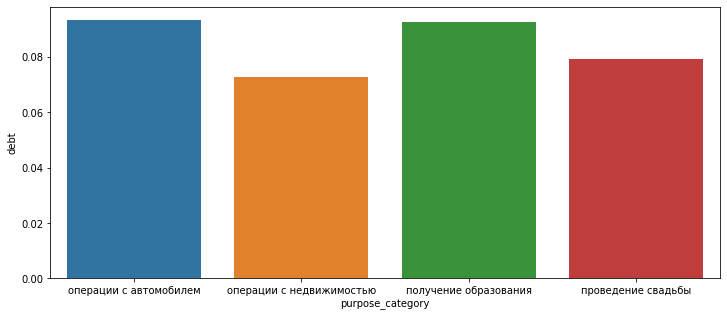

,count,mean
purpose_category,,
операции с автомобилем,4279,0.093480
операции с недвижимостью,10751,0.072551
получение образования,3988,0.092528
проведение свадьбы,2313,0.079118


In [33]:
df_plot = data.groupby('purpose_category')['debt'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot, x='purpose_category', y='debt')
plt.show()
display(data.groupby('purpose_category')['debt'].agg(['count', 'mean']))

**Вывод:** <br>
- Доля просроченных кредитов по "операции с автомобилям" самая высокая (9.35%)
- Доля просроченных кредитов по "получение образования" равна 9.25%
- Доля просроченных кредитов по "проведение свадьбы" равна 7.9%
- Доля просроченных кредитов по "операции с недвижимостью" самая низкая (7.25%)

#### Посмотрим на возможные причины появления пропусков в исходных данных.

<AxesSubplot:>

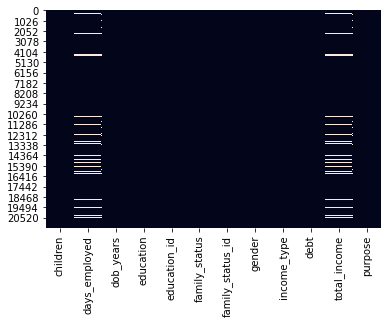

In [2]:
sns.heatmap(data.isnull(), cbar=False)

*Вывод:* <br>

В данных в двух столбцах есть пропущенные значения.<br>
Один из них — `days_employed`(количество дней трудового стажа).  Другой столбец с пропущенными значениями — `total_income` (данные о доходах). 
<br>

Количество пропусков в обоих столбцах: `2174`
<br>

К возможным причинам появления пропусков можно отнести: 
1. ошибки ввода данных (Пропуски в `days_employed` могут свидетельствовать об отсутствие трудогого стажа)
2. сокрытие информации (Пропуски в `total_income` о нежалании делиться своим доходом с банком)
<br>

Все пропуски находятся в одних и тех же пропусках(картинка выше). В связи с этим можно сделать предположение что пропуски связаны с обращением безработных людей или людей не имеющих постоянного места работы

### Общий вывод.

Было проведено исследоване, чтобы выявить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<br>

Необходимо было проверить несколько гипотез:
1. <ins>Гипотеза № 1</ins>:  Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. <ins>Гипотеза № 2</ins>:  Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. <ins>Гипотеза № 3</ins>:  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. <ins>Гипотеза № 4</ins>:  Как разные цели кредита влияют на его возврат в срок?

<br>

Результаты исследования показали:

<br>

**Гипотеза № 1 частично подтверждена:** *(Для более точных выводов необходимо больше данных по клиентам с 3, 4 и 5 детьми)*
- 7.5% - доля просроченных кредитов у заемщиков без детей
- 9.2% - доля просроченных кредитов у заемщиков с 1 ребенком
- 9.5% - доля просроченных кредитов у заемщиков с 2 детьми
<br>

*Рекомедация:* провести дополнительные исследования на большей выборке 

<br>

**Гипотеза № 2 подтверждена:**
- Люди с семейным положением "В разводе", "Вдова / вдовец", "Женат / замужем" имеют долю просрочки (7.45%) ниже чем люди с семейным положением "Не женат / не замужем" и "Гражданский брак" (9.5%)

<br>

**Гипотеза № 3 частично подтверждена:** *(Для более точных выводов необходимо больше данных по клиентам с доходом D, A и E)*
- 7.1% - доля просрочки у клиента с категорией зарплаты `B` (200001–1000000) 
- 8.5% - доля просрочки у клиента с категорией зарплаты `C` (50001–200000)
<br>

*Рекомедация:* провести дополнительные исследования на большей выборке 

<br>

**Гипотеза № 4 подтверждена:** 
- Доля просроченных кредитов по "операции с автомобилям" самая высокая (9.35%)
- Доля просроченных кредитов по "получение образования" равна 9.25%
- Доля просроченных кредитов по "проведение свадьбы" равна 7.9%
- Доля просроченных кредитов по "операции с недвижимостью" самая низкая (7.25%)

<br>

**Общии рекомендации**:
<br>
1. Специалистам, которые занимаются построением модели кредитного скоринга, можно использовать зависимости из 2 и 4 гипотезыю
2. Необходимо собрать более полную выборку для повторной проверки 1 и 3 гипотезы.